# Regression Analysis

<br>
## Boston Housing Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/samet/Desktop/rashka/code/datasets/housing/housing.data",
                 header=None, sep= '\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<br>
## Visualizing the important characteristics of a dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

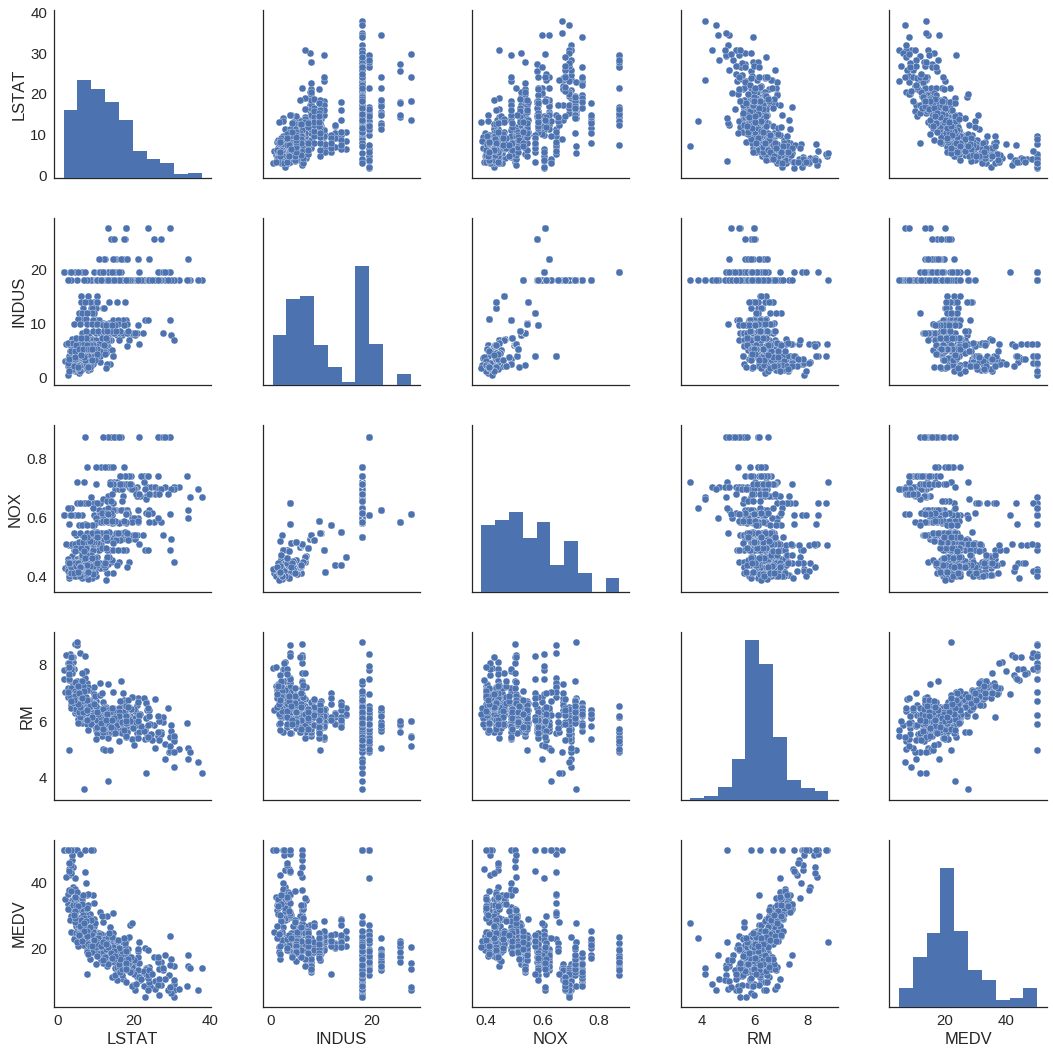

In [5]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.set(style='white', context='notebook',font_scale=1.5)
sns.pairplot(df[cols], size=3)
plt.tight_layout()
plt.show()

In [6]:
import numpy as np

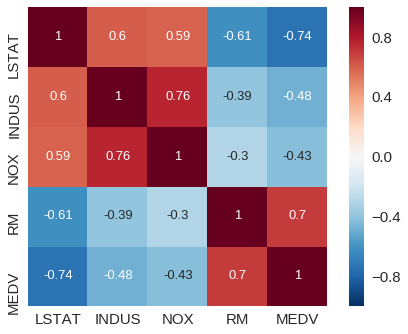

In [7]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cm,
            cbar=True,
            annot=True,
            square=True,
           annot_kws={'size': 13},
           yticklabels=cols,
           xticklabels=cols)
plt.show()

In [8]:
sns.reset_orig()
#or
# reload(plt)

<br>
## Linear Regression with Gradient Descent 

In [9]:
df.T.shape

(14, 506)

In [10]:
class LinearRegressionGd(object):
    
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [11]:
# two different ways of arrays
X = df[['RM']].values
y = df['MEDV'].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [13]:
lr = LinearRegressionGd()
lr.fit(X_std, y_std)

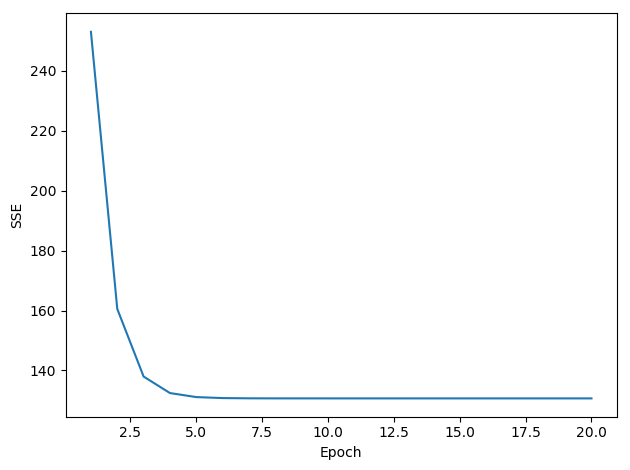

In [14]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [15]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return 

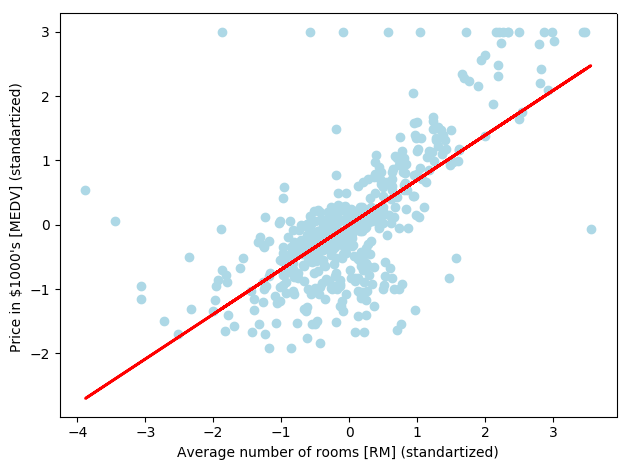

In [16]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM] (standartized)')
plt.ylabel('Price in $1000\'s [MEDV] (standartized) ')
plt.tight_layout()
plt.show()

In [17]:
print 'Slope: %.3f' % lr.w_[1]
print 'Intercept : %.3f' % lr.w_[0]

Slope: 0.695
Intercept : -0.000


In [18]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


<br>
## Estimating the coefficients of a regression model by scikit-learn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
slr = LinearRegression()
slr.fit(X, y)
print 'Slope: %.3f' % slr.coef_[0]
print 'Intercept %.3f' % slr.intercept_

Slope: 9.102
Intercept -34.671


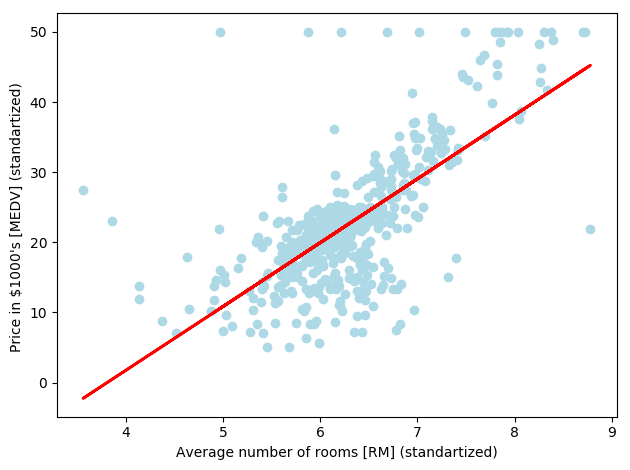

In [21]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM] (standartized)')
plt.ylabel('Price in $1000\'s [MEDV] (standartized) ')
plt.tight_layout()
plt.show()

#### Normal Equations

In [22]:
# a code snippet to measure time
from time import time
t0 = time()
print "training time:", round(time()-t0, 3), "s\n"

training time: 0.0 s



In [23]:

Xb = np.hstack((np.ones((X.shape[0],1)),X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


<br>
## Fitting a robust regression model using RANSAC

In [24]:
from sklearn.linear_model import RANSACRegressor

In [25]:
ransac = RANSACRegressor(LinearRegression(),
                    max_trials=100,
                    min_samples=50,
                    loss='absolute_loss',
                    residual_threshold=5.0,
                    random_state=0)

ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

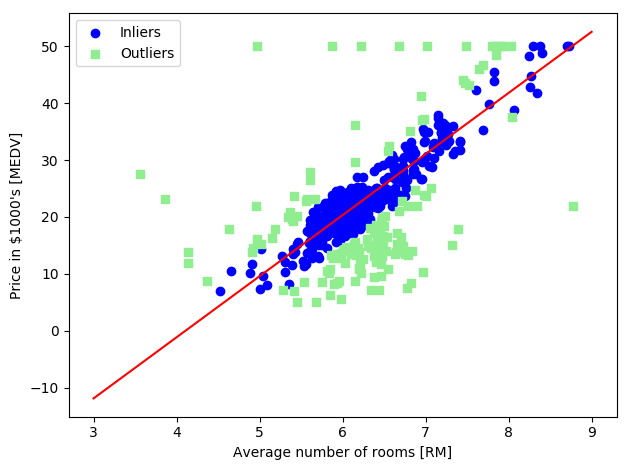

In [26]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [27]:
print 'Slope: %.3f' % ransac.estimator_.coef_[0]
print 'Intercept: %.3f' % ransac.estimator_.intercept_

Slope: 10.735
Intercept: -44.089


<br>
## Evaluating the performance of linear regression models

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

#### Residual analysis

In [30]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

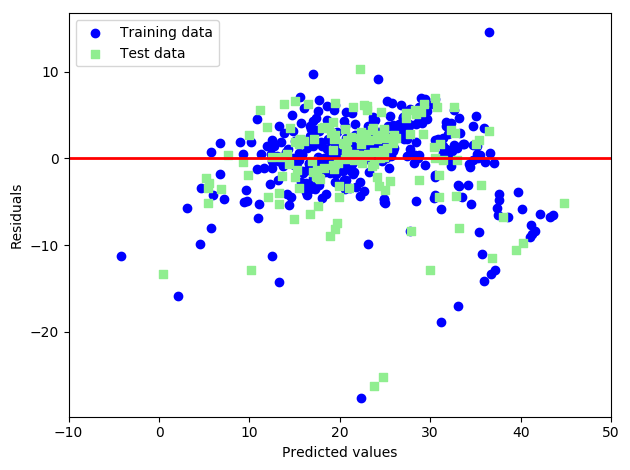

In [31]:
plt.scatter(y_train_pred, (y_train_pred-y_train),
           c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, (y_test_pred-y_test),
           c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

#### MSE and $R^2$

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:
print 'MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))
print 'Rsquare train:%.3f, test:%.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

MSE train:19.958, test:27.196
Rsquare train:0.765, test:0.673


<br>
## Using regularized methods for regression

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
lasso.coef_ # nox variable has 0 coef

array([-0.11311792,  0.04725111, -0.03992527,  0.96478874, -0.        ,
        3.72289616, -0.02143106, -1.23370405,  0.20469   , -0.0129439 ,
       -0.85269025,  0.00795847, -0.52392362])

In [36]:
print 'MSE train:%.3f, test:%.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred))
print 'Rsquare train:%.3f, test:%.3f' %(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))

MSE train:20.926, test:28.876
Rsquare train:0.753, test:0.653


<br>
## Turning a linear regression model into a curve - polynomial regression

In [37]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [40]:
# fit linear features
lr.fit(X,y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

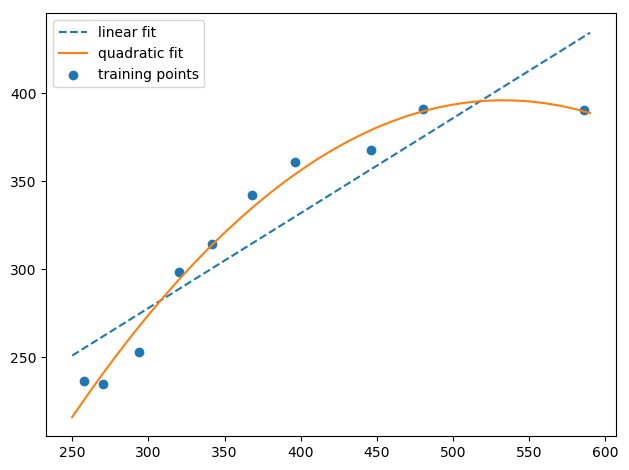

In [41]:
# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [43]:
print 'MSE train:%.3f, test:%.3f' %(mean_squared_error(y, y_lin_pred), mean_squared_error(y, y_quad_pred))
print 'Rsquare train:%.3f, test:%.3f' %(r2_score(y, y_lin_pred), r2_score(y, y_quad_pred))

MSE train:569.780, test:61.330
Rsquare train:0.832, test:0.982


<br>
## Modeling nonlinear relationships in the Housing Dataset

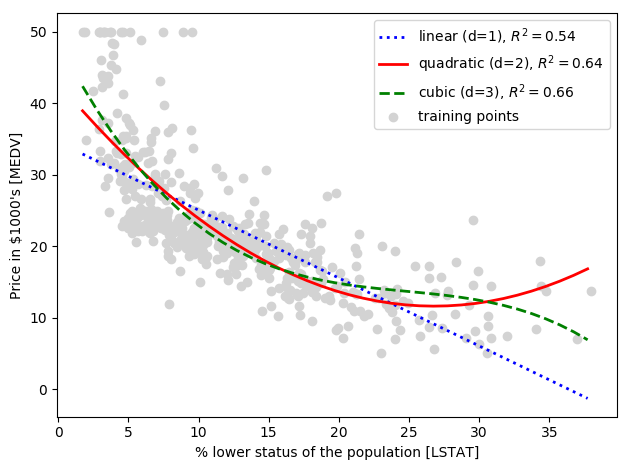

In [67]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:,np.newaxis]

regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
# plt.savefig('./figures/polyhouse_example.png', dpi=300)
plt.show()

#### Transform features

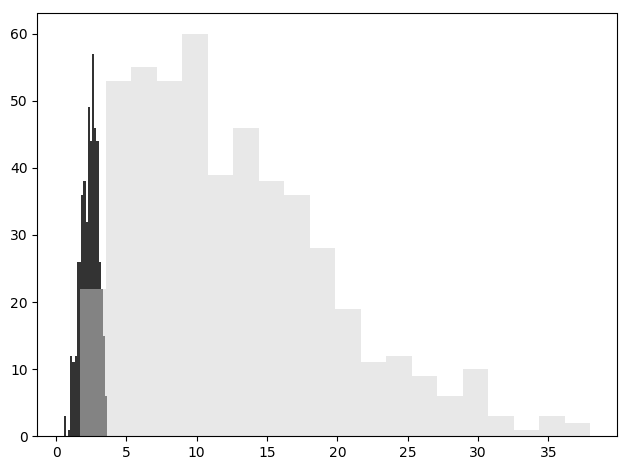

In [105]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

plt.hist(np.log(X),
         alpha=.8,bins=20,color='black')
plt.hist(X,alpha=.5,bins=20,color='lightgray')
plt.tight_layout()
plt.show()

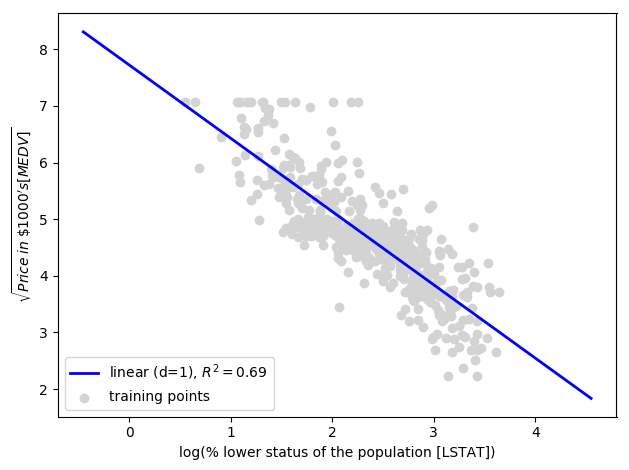

In [107]:
# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

#plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

<br>
## Decision Tree Regression

In [110]:
from sklearn.tree import DecisionTreeRegressor

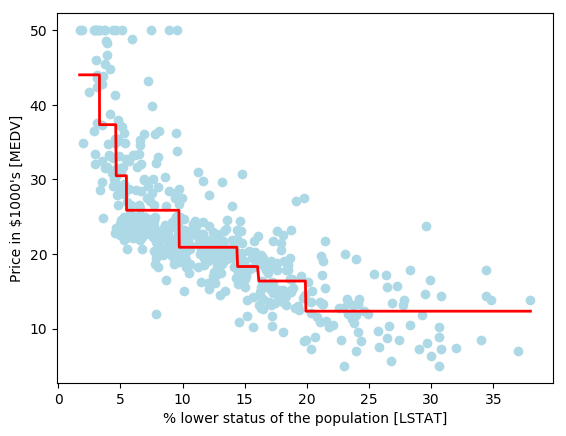

In [113]:
X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

## Random Forest Regression

In [116]:
X =  df.iloc[:, :-1].values
y = df['MEDV'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=1,
                              n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print 'MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred))
print 'R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


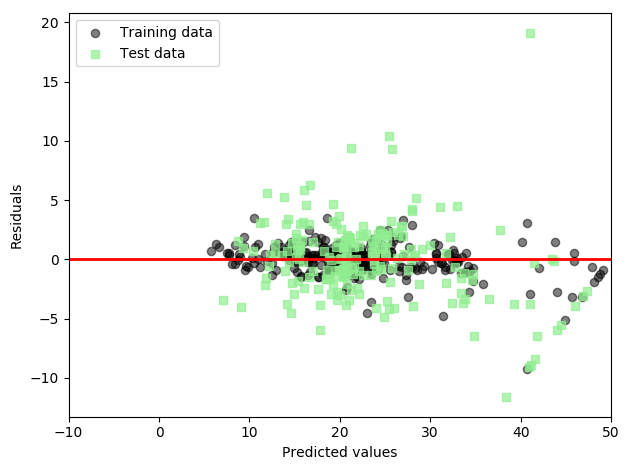

In [121]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()


plt.show()